# Reinforcement Learning Notes

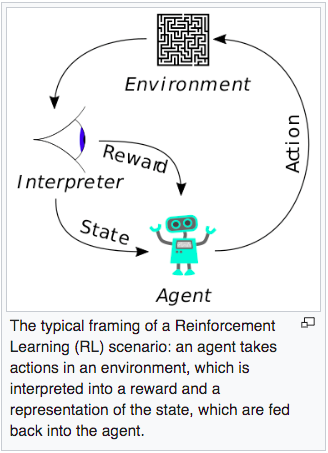

- A Reward $R_t$ is a scalar feedback signal that indicates how well an agent is doing at step $t$.
- The Agent's job is to maximize the cumulative reward
- Reinforcement Learning is based on the reward hypothesis:
    All goals can be described by the maximization of expected cumulative reward

- Elements are Actions ($A_t$), Rewards ($R_t$), and observations ($O_t$)
- History is the sequence of actions, observations, and rewards

$$H_t = A_1, O_1, R_1, ... A_t, O_t, R_t$$

- The environment state ($S^e_t$) is the environment's private representation
- The Agent state ($S^a_t$) is the agent's internal representation, and can be any function of the history
$$S_t^a = f(H_t)$$

State $S_t$ is Markov if and only if the probability of the next state $\mathbb{P}$ satisfies
$$\mathbb{P}[S_{t+1}|S_t] = \mathbb{P}[S_{t+1}|S_1, S_2, ... S_t]$$

- Full observability vs Partial Observability: Agent directly or indirectly observes environment state


An RL agent may include one or more of these components:
- Policy: agents behavior function
- Value Function: How good is each state and/or action
- Model: Agent's represenation of the environment

Value function is a prediction of future reward
$$v_{\pi}(s) = \mathbb{E}_{\pi}[R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} +.... | S_t = s]$$
Where $\mathbb{E}$ is expectation value

- A model predicts what the environment will do next
- Transitions $\mathcal{P}$ predicts the next state
- Rewards: $\mathcal{R}$ predicts the next (immediate) reward

For example:
$$\mathcal{P}^a_{ss'} = \mathbb{P}[S'=s'|S=s, A=a]$$
$$\mathcal{R}_s^a = \mathbb{E}[R|S=s, A=a]$$

$\mathcal{P}^a_{ss'}$ represents the probability of transitioning from state $s$ to $s'$ given action $a$

State transition marix
$$\mathcal{P} = 
\begin{bmatrix}
    \mathcal{P}_{11} & \mathcal{P}_{12} & \dots  & \mathcal{P}_{1n} \\
    \mathcal{P}_{21} & \mathcal{P}_{22} & \dots  & \mathcal{P}_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    \mathcal{P}_{m1} & \mathcal{P}_{m2} & \dots  & \mathcal{P}_{mn}
\end{bmatrix}
$$

## Markov Process (MP)
a memoryless random process, ie a sequence of random states $S_1$, $S_2$ ... with the Markov property

- Markov Process (or Markov chain) is a tuple ($\mathcal{S}$, $\mathcal{P}$)
- $\mathcal{S}$ is a (finite) set of states
- $\mathcal{P}$ is a state transition probability matrix

## Markov Reward Process (MRP)
A Markov chain with values

- Markov Reward Process is a tuple ($\mathcal{S}$, $\mathcal{P}$, $\mathcal{R}$, $\gamma$)
- $\mathcal{S}$ is a (finite) set of states
- $\mathcal{P}$ is a state transition probability matrix
- $\mathcal{R}$ is a reward function $\mathcal{R}_s = \mathbb{E}[R_{t+1}|S_t=s]$
- $\gamma$ is a discount factor, $\gamma \in [0, 1]$

The return $G_t$ is the total discounted reward from time-step t
$$ G_t = R_{t+1} + \gamma R_{t+2} + ... = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1} $$

- The value function $v(s)$ gives the long-term value of state $s$
- The state value function $v(s)$ of an MRP is the expected return starting from state $s$
$$ v(s) = \mathbb{E}[G_t | S_t = s] $$

The value function can be decomposed into two parts
- immediate reward $R_{t+1}$
- discounted value of successor state $\gamma v(S_{t+1})$
$$ v(s) = \mathbb{E}[G_t|S_t=s] = \mathbb{E}[R_{t+1} + \gamma v(S_{t+1}) | S_t=s] $$

## Bellman Equation

$$
\begin{bmatrix}
    v(1) \\
    v(2) \\
    \vdots \\
    v(n)
\end{bmatrix}
=
\begin{bmatrix}
    \mathcal{R}_1 \\
    \mathcal{R}_2 \\
    \vdots \\
    \mathcal{R}_n
\end{bmatrix}
+ \gamma
\begin{bmatrix}
    \mathcal{P}_{11} & \mathcal{P}_{12} & \dots  & \mathcal{P}_{1n} \\
    \mathcal{P}_{21} & \mathcal{P}_{22} & \dots  & \mathcal{P}_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    \mathcal{P}_{m1} & \mathcal{P}_{m2} & \dots  & \mathcal{P}_{mn}
\end{bmatrix}
\begin{bmatrix}
    v(1) \\
    v(2) \\
    \vdots \\
    v(n)
\end{bmatrix}
$$

Or simply

$$ v = \mathcal{R} + \gamma \mathcal{P} v $$

and solving for $v$ gives

$$ v = (I - \gamma \mathcal{P})^{-1} \mathcal{R} $$

## Markov Decision Process (MDP)
A Markov decision process is a Markov Reward process with decisions. It is an environment in which all states are Markov

- Markov Decision Process is a tuple ($\mathcal{S}$, $\mathcal{A}$,  $\mathcal{P}$, $\mathcal{R}$, $\gamma$)
- $\mathcal{S}$ is a (finite) set of states
- $\mathcal{A}$ is a finite set of actions
- $\mathcal{P}$ is a state transition probability matrix
- $\mathcal{P}^a_{ss'} = \mathbb{P}[S_{t+1}=s'|S_t=s, A_t=a]$
- $\mathcal{R}$ is a reward function $\mathcal{R}^a_s = \mathbb{E}[R_{t+1}|S_t=s, A_t=a]$
- $\gamma$ is a discount factor, $\gamma \in [0, 1]$

A policy is a distribution over actions given states
$$ \pi(a|s) = \mathbb{P}[A_t=a|S_t=s] $$
A policy fully determines the behavior of an agent
MDP policies depend on the current state (not the History)

- Given an MDP $\mathcal{M}$ = ($\mathcal{S}$, $\mathcal{A}$,  $\mathcal{P}$, $\mathcal{R}$, $\gamma$) and a policy $\pi$
- The state sequence $S_1$, $S_2$, ... is a Markov process
($\mathcal{S}$, $\mathcal{P}^{\pi}$)
- The state and reward sequence $S_1$, $R_1$, $S_2$, $R_2$, ...
is a Markov reward process
($\mathcal{S}$, $\mathcal{P}^{\pi}$, $\mathcal{R}^{\pi}$, $\gamma$) where
$$ \mathcal{P}^{\pi}_{s,s'} = \sum_{a \in \mathcal{A}} \pi(a|s) \mathcal{P}^a_{s,s'} $$
$$ \mathcal{R}_s^{\pi} = \sum_{a \in \mathcal{A}} \pi(a|s) \mathcal{R}_s^a $$

### Definitions
- The _state-value function_ $v_{\pi}(s)$ of an MDP is the expected return starting from state $s$ and then following policy $\pi$
$$ v_{\pi}(s) = \mathbb{E}_{\pi}[G_t|S_t=s] $$
- The _action-value function_ $q_{\pi}(s,a)$ is the expected return starting from state s, taking action a, and then following policy $\pi$
$$ q_{\pi}(s, a) = \mathbb{E}_{\pi}[G_t|S_t=s, A_t=a] $$

## Bellman Expectation Equations

The state-value function can again be decomposed into immediate reward plus discounted value of sucessor state
$$ v_{\pi}(s) = \mathbb{E}_{\pi}[R_{t+1} + \gamma v_{\pi}(S_{t+1}) | S_t=s] $$
The action-value function can similarly be decomposed
$$ q_{\pi}(s, a) = \mathbb{E}_{\pi}[R_{t+1} + \gamma q_{\pi}(S_{t+1}, A_{t+1}) | S_t=s, A_t=a] $$
$$ = \mathbb{E}_{\pi}[R_{t+1} + \gamma v_{\pi}(S_{t+1}) | S_t=s, A_t=a]  $$

$$ v_{\pi}(s) = \sum_{a \in \mathcal{A}} \pi(a|s) q_{\pi}(s, a) $$
$$ q_{\pi}(s, a) = \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ v_{\pi}(s') $$
Putting these togetger, can yield
$$ v_{\pi}(s) = \sum_{a \in \mathcal{A}} \pi(a|s) \bigg( \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ v_{\pi}(s') \bigg) $$
$$ q_{\pi}(s, a) = \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ 
\sum_{a' \in \mathcal{A}} \pi(a'|s') q_{\pi}(s', a')$$

Clearly

$$ v_{\pi} = \mathcal{R}^{\pi} + \gamma \mathcal{P}^{\pi} v_{\pi} $$

and solving for $v_{\pi}$ gives

$$ v_{\pi} = (I - \gamma \mathcal{P}^{\pi})^{-1} \mathcal{R}^{\pi} $$

## Optimal Value Function

### Definitions
- The _optimal state-value function_ $v_*(s)$ is the maximum value function over all policies
$$ v_*(s) = \underset{\pi}{\mathrm{max}} \ v_{\pi}(s) $$
- The _optimal action-value function_ $q_*(s,a)$ is the maximum action-value function over all policies
$$ q_*(s,a) = \underset{\pi}{\mathrm{max}} \ q_{\pi}(s,a) $$

- The optimal value function specifies the best possible performance in the MDP
- The MDP is "solved" when we know the optimal value function

## Optimal Policies

Define a partial ordering over policies

$ \pi >= \pi'$ if $v_{\pi}(s)>=v_{\pi'}(s), \forall s$
### Theorem
For any Markov decision process
- There exists an optimal policy $\pi_*$ that is better than or equal to all other policies
$\pi_* >= \pi, \forall \pi$
- All optimal policies achieve the optimal value function $v_{\pi_*}(s) = v_*(s)$
- All optimal policies achieve the optimal action-value function $q_{\pi_*}(s, a) = q_*(s,a)$

An optimal policy can be found by maximising over $q_{\pi}(s,a)$
$$ \pi_*(a|s) = 
     \begin{cases}
       1 \ \ \mathrm{if} \ \ a = \underset{a \in \mathcal{A}}{\mathrm{argmax}} \ q_*(s,a) \\
       0 \ \ \mathrm{otherwise} \\
     \end{cases}$$
- There is always a deterministic optimal policy for any MDP
- If we know $q_*(s,a)$, we immediately have the optimal policy

### Bellman Optimality Equation for $v_*$
$$ v_*(s) = \underset{a}{\mathrm{max}} \ q_*(s,a) $$
$$ = \underset{a}{\mathrm{max}} \bigg[ \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ v_*(s') \bigg] $$
$$  $$

### Bellman Optimality Equation for $q_*$

$$ q_*(s,a) =  \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ v_*(s') $$
$$ q_*(s,a) =  \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ \underset{a'}{\mathrm{max}} \ q_*(s',a') $$
$$  $$

* Bellman Optimality Equation is non-linear
* Generally no closed form solution
* Many iterative solution methods
    * Value Iteration
    * Policy Iteration
    * Q-learning
    * Sarsa

## Finding $v(s)$: Bellman expectation backup

* Problem: evaluate a given policy $\pi$
* Solution: iterative application of Bellman expectation backup
* $v_1 \rightarrow v_2 \rightarrow \ldots \rightarrow v_*$
* Using synchronous backups
    * At each iteration $k+1$
    * For all states $s \in \mathcal{S}$
    * Update $v_{k+1}(s)$ from $v_k(s')$
    * where s' is a successor state of s
* We will discuss asynchronous backups later
* Convergence to $v_\pi$ will be proven at the end of lecture

### Synchronous backups
$$ v^{k+1} = \mathcal{R}^{\pi} + \gamma \mathcal{P}^{\pi} v^k $$
until $v$ doesnt change

## Policy Iteration

* Given a policy $\pi$
    * evaluate policy $\pi$ (solve for $v_{\pi}$)
    * improve the policy by acting greedily with respect to $v_{\pi}$
$$ \pi' = \mathrm{greedy}(v_{\pi}) $$
* This policy of _policy iteration_ always converges to $\pi*$

So in the above paradigm, you start with a random policy, find $v$ for that policy, update the policy to act greedily with respect to that $v$, and repeat.

* Consider a deterministic policy $a = \pi(s)$
* we can improve the policy by acting greedily
$$ \pi'(s) = \underset{a \in \mathcal{A}}{\mathrm{argmax}} \ q_{\pi}(s,a) $$
* This improves the value from any state s over one step
$$ q_{\pi}(s, \pi'(s)) = \underset{a \in \mathcal{A}}{\mathrm{max}} \ q_{\pi}(s,a)
 \geq q_{\pi}(s,\pi(s)) = v_{\pi}(s) $$
* It therefore improves the value function $v_{\pi'}(s) \geq v_{\pi}(s)$, as seen from the recursion below
$$ v_{\pi}(s) \leq q_{\pi}(s,\pi'(s)) = 
\mathbb{E}_{\pi'}[R_{t+1} + \gamma v_{\pi}(S_{t+1}) | S_t=s] $$

$$ = \mathbb{E}_{\pi'}[R_{t+1} + \gamma q_{\pi}(S_{t+1}, \pi(S_{t+1})) | S_t=s] $$

$$ \leq \mathbb{E}_{\pi'} [R_{t+1} + \gamma q_{\pi}(S_{t+1}, \pi'(S_{t+1})) | S_t=s] $$

$$ = \mathbb{E}_{\pi'}[R_{t+1} + \gamma R_{t+2} + \gamma v_{\pi}(S_{t+2}) | S_t=s] $$
$$ \leq \mathbb{E}_{\pi'} [R_{t+1} + \gamma R_{t+2} + \ldots | S_t = s] = v_{\pi'}(s) $$
* If improvements, stop
$$ q_{\pi}(s, \pi'(s)) = \underset{a \in \mathcal{A}}{\mathrm{max}} \ q_{\pi}(s,a)
 = q_{\pi}(s,\pi(s)) = v_{\pi}(s)$$
 * Then the Bellman optimality equation has been satisfied
 $$ v_{\pi}(s) = \underset{a \in \mathcal{A}}{\mathrm{max}} \ q_{\pi} (s,a) $$
* Therefore, $v_{\pi}(s) = v_{*}(s) \ \forall s \in \mathcal{S}$

## Value Iteration

* Any optimal policy can be subdivided into two components:
    * An optimal first action $A_*$
    * Followed by an optimal policy from successor state $S'$

### Theorem (Principle of Optimality)
A policy $\pi(a|s)$ achieves the optimal value from state $s$, $v_{\pi}(s) = v_*(s)$ if and only if:

For any state $s'$ reachable from $s$, $\pi$ achieves the optimal value from state $s'$
$$ v_{\pi}(s') = v_*(s') $$

* If we know the solution to subproblems $v_*(s')$
* Then solution $v_*(s)$ can be found by one step lookahead
$$ v_*(s) \leftarrow \underset{a \in \mathcal{A}}{\mathrm{max}} \ \bigg[ \mathcal{R}_s^a
 + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}^a_{ss'} \ v_*(s') \bigg] $$
* The idea of value iteration is to apply these updates iteratively
* Intuition: start with final rewards, work backwards
* Still works with loopy, stochastic MDPs

* Problem: find optimal policy $\pi$
* Solution: iterative application of Bellman optimality backup
* $v_1 \rightarrow v_2 \rightarrow \ldots \rightarrow v_*$
* using synchronous backups
    * At each iteration $k+1$
    * for all states $s \in \mathcal{S}$
    * update $v_{k+1}(s)$ from $v_k(s')$
* convergence to $v_*$ will be proven later
* unlike policy iteration, there is no explicit policy
* Intermediate value functions may not correspond to any policy

$$ v_{k+1} = \underset{a \in \mathcal{A}}{\mathrm{max}} \ [\mathcal{R}^a + \gamma \mathcal{P}^a v_k] $$

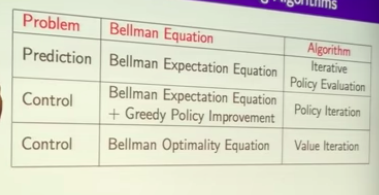
* Algorithms are based on state-value function $v_{\pi}(s)$ or $v_*(s)$
* Complexity $O(m n^2)$ per iteration, for m actions and n states
* Could also apply to action-value function $q_{\pi}(s,a)$ or $q_{*}(s,a)$
* Complexity $O(m^2 n^2)$ per iteration

## Extensions to Dynamic Programming

* DP methods described so far used synchronous backups
* ie all states are backed up in parallel
* Asynchronous DP backs up states individually, in any order
* For each selected state, apply the appropriate backup
* Can significantly reduce computation
* Guaranteed to converge if all states continue to be selected

- Three simple ideas for dynamic programming
    - In-place dynamic programming
    - prioritised sweeping
    - Real-time dynnamic programming

### In-place Dynamic Programming

Synchronous value iteration store two copies of value function

 for all $s$ in $\mathcal{S}$
 $$ v_{\text{new}}(s) \leftarrow \underset{a \in \mathcal{A}}{\mathrm{max}} \bigg( \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a v_{\text{old}}(s') \bigg) $$
 
 In-place value iteration only stores one copy of the value function
 
  for all $s$ in $\mathcal{S}$
 $$ v(s) \leftarrow \underset{a \in \mathcal{A}}{\mathrm{max}} \bigg( \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a v(s') \bigg) $$

### Prioritized Sweeping

- Use magnitude of Bellman error to guide state selection, e.g.
$$ \bigg| \ \underset{a \in \mathcal{A}}{\mathrm{max}} \bigg(\mathcal{R}^a_s + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a v(s') \bigg) - v(s) \bigg| $$
- Backup the state with the largest remaining Bellman error
- Update Bellman error of affected states after each backup
- Requires knowledge of reverse dynamics (predecessor states)
- Can be implemented efficiently by maintaining a priority queue

### Real-Time Dynamic Programming

Actually run the agent, and update the states that the agent visits. Presumably, these are the most relevant states
- Idea: only states that are relevant to agent
- Use agent's experiences to guide selection of states
- After each time-step $S_t$, $A_t$, $R_{t+1}$
- Backup the state $S_t$
 $$ v(S_t) \leftarrow \underset{a \in \mathcal{A}}{\mathrm{max}} \bigg( \mathcal{R}_{S_t}^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a v(s') \bigg) $$

# Lecture 4: Model-Free Prediction
- Itroduction
- Monte-Carlo Learning
- Temporal Difference Learning
- TD($\lambda$)

- Last Lecture
    - Planning by Dynamic Programming
    - Solve a known MDP
- This Lecture
    - Model-free predicton
    - Estimate the value function of an unknown MDP
- Next Lecture
    - Model-free control
    - Optimize the value function of an unknown MDP

# Monte-Carlo Reinforcement Learning
- MC Methods learn directly from episodes of experience
- MC is model free: no knowledge of MDP transitions/rewards
- MC learns from complete episodes: no bootstrapping
- MC uses the simplest possible idea: value = mean return
- Caveat: can only apply MC to episodic MDPs. So all episodes must terminate

- Gloal: learn $v_{\pi}$ from episodes of experience under policy $\pi$
$$ S_1, A_1, R_2, ... S_k \sim \pi $$
- Recall that the return is the total discounted reward:
$$ G_t = R_{t+1} + \gamma R_{t+2} + ... + \gamma^{T-1} R_T $$
- Recall that the value function is the expected return:
$$ v_{\pi}(s) = \mathbb{E}_{\pi} [ G_t | S_t = s] $$
- Monte-Carlo policy evaluation uses empirical mean return instead of expected return

## First-Visit Monte-Carlo Policy Evaluation

- To evaluate state $s$
- The first time-step that state $s$ is visited in an episode
    - Increment the counter $N(s) \leftarrow N(s) + 1$
    - Increment total return $S(s) \leftarrow S(s) + G_t$
- Value is estimated by mean return $V(s) = S(s)/N(s)$
- by law of large numbers, $V(s) \rightarrow v_{\pi}(s)$ as $N(s) \rightarrow \infty$

## Every-Visit Monte-Carlo Policy Evaluation

- To evaluate state $s$
- EVERY time-step that state $s$ is visited in an episode
    - Increment the counter $N(s) \leftarrow N(s) + 1$
    - Increment total return $S(s) \leftarrow S(s) + G_t$
- Value is estimated by mean return $V(s) = S(s)/N(s)$
- by law of large numbers, $V(s) \rightarrow v_{\pi}(s)$ as $N(s) \rightarrow \infty$

## Incremental Monte-Carlo Learning

- Update $V(s)$ incrementally after episode $S_1, A_1, R_2, ..., S_T$
- For each state $S_t$ with return $G_t$
$$ N(S_t) \leftarrow N(S_t) + 1 $$
$$ V(S_t) \leftarrow V(S_t) + \frac{1}{N(S_t)}(G_t - V(S_t)) $$
For non-stationary prolems, it can be useful to track a running mean, ie forget old episodes
$$ V(S_t) \leftarrow V(S_t) + \alpha (G_t - V(S_t)) $$

# Temporal-Difference Learning

- TF methods learn directly from episodes of experience (like MC)
- TD is model free, no knowledge of MDP transitions/rewards
- TD learns from incomplete episodes, by bootstrapping (UNLIKE MC)
- TD updates a guess twards a guess

- Goal: learn $v_{\pi}$ online from experience under policy $\pi$
- Incremental every-visit Monte-Carlo
    - Update value $V(S_t)$ toward actual return $G_t$
$$ V(S_t) \leftarrow V(S_t) + \alpha (G_t - V(S_t)) $$
- Simplest temporal-difference learning algorithm: TD(0)
    - Update value $V(S_t)$ toward estimated return $R_{t+1} + \gamma V(S_{t+1})$
$$ V(S_t) \leftarrow V(S_t) + \alpha (R_{t+1} + \gamma V(S_{t+1}) - V(S_t)) $$
- $R_{t+1} + \gamma V(S_{t+1})$ is called the TD target
- $ \delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \$  is called the TD error

## Advanntages and Disadvantages of MC vs TD

- TD can learn before knowing final outcome
    - TD can learn online after every step
    - MC must wait until end of episode before return is known
- TD can learn without the final outcome
    - TD can learn from incomplete sequences
    - TD works in continuint (non-terminating) environments

## Bias-Variance tradeoff

- Return $G_t = R_{t+1} + \gamma R_{t+2} + ... + \gamma^{T-1} R_T$ is unbiased estimate of $v_{\pi}(S_t)$
- True TD target $R_{t+1} + \gamma v_{\pi}(S_{t+1})$ is unnbiased estimate of $v_{\pi}(S_t)$
- TD target $R_{t+1} + \gamma V(S_{t+1})$ is biased estimate of $v_{\pi}(S_t)$
    - Return depends on many random actions, transitions, rewards
    - TD target depends on one random action, transition, reward

- MC has high variance, zero bias
    - Good convergence properties (even with function approximation)
    - Not very sensitive to initial value
    - Very simple to understand and use
- TD has low variance, some bias
    - Usually more efficient than MC
    - TD(0) converges to $v_{\pi}(s)$, but not alwasy with function approximation
    - More sensitive to initial value

- TD exploits Markov property
    - Usually more efficient in Markov environments
- MC doesn't exploit the markov property
    - Usually more effective in non-Markov environments

- Bootstrapping
    - MC does not bootstrap
    - DP bootstraps
    - TD bootstraps
- Sampling
    - MC samples
    - DP does not sample
    - TD samples

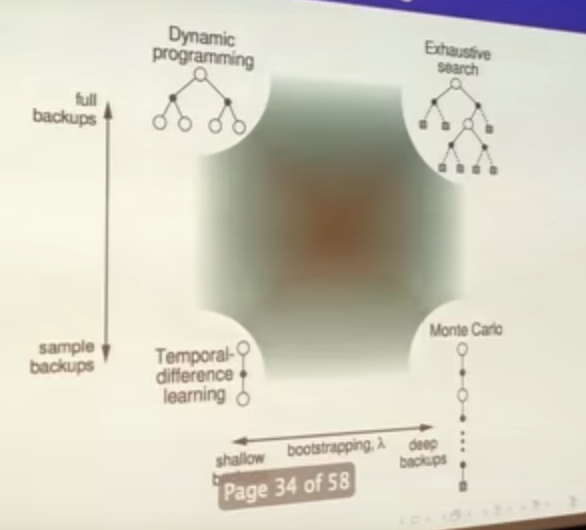

# TD($\lambda$)

- Let TD target look n steps into the future

- Consider the following n-step returns for $n=1, 2, ... \infty$
$$ n = 1 \ \ \text{(TD)} \ \ G^{(1)}_t = R_{t+1} + \gamma V(S_{t+1})  $$
$$ n = 2 \ \  \ \ G^{(2)}_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 V(S_{t+2})  $$
$$ . $$
$$ . $$
$$ n = \infty \ \  \ \ G^{(\infty)}_t = R_{t+1} + \gamma R_{t+2} + ... +  \gamma^{T-1} R_T  $$
- Define the n-step return
$$ G^{(n)}_t = R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1}R_{t+n} + \gamma^n V(S_{t+n}) $$
- n-step temporal differene learning
$$ V(S_t) \leftarrow V(S_t) + \alpha (G_t^{(n)} - V(S_t)) $$

## $\lambda$-return

- The $\lambda$ return $G_t^{\lambda}$ combines all n-step returns $G_t^{(n)}$
- Using weight $(1- \lambda) \lambda^{n-1}$
$$ G_t^{\lambda} = (1 - \lambda) \sum_{n=1}^{\infty} \lambda^{n-1} G_t^{(n)} $$
- Forward-view TD($\lambda$)
$$ V(S_t) \leftarrow V(S_t) + \alpha (G_t^{\lambda} - V(S_t)) $$

## Forward-view TD($\lambda$)

- Update value function towards the $\lambda$-return
- Forward view looks into the future to compute $G_t^{\lambda}$
- Like MC, can onnly be computed from complete episodes

## Backwad-view TD($\lambda$)

- Forward-view provides theory
- Backwards view provides mechanism
- Update online, every step, from incomplete sequences

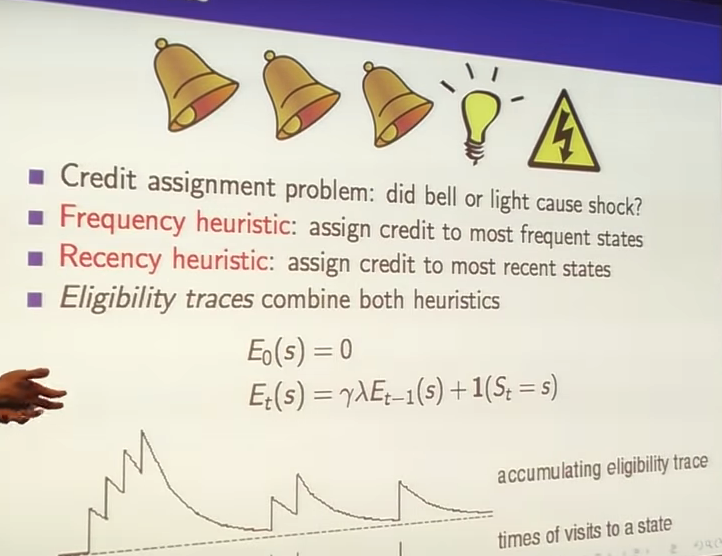

- keep an eligibility trace for every state $s$
- Update value $V(S)$ for every state $s$
- In proportion to TD-error, $\delta_t$ and eligibility trace $E_t(s)$
$$ \delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t) $$
$$ V(s) \leftarrow V(s) + \alpha \delta_t E_t(s) $$

- When $\lambda$ = 0, only current state is updated. this is exactly TD(0)

- When $\lambda$ = 1, credit is deferred until end of episode
- Consider episodic environments with offline updates
- over the course of an episode, total update for TD(1) is the same as total update for MC

Theorem:

The sum of offline updates is identical for forward-view and backward-view TD($\lambda$) (not proved here)

$$ \sum_{t=1}^T \alpha \delta_t E_t(S) = \sum_{t=1}^T (G_t^{\lambda} - V(S_t)) \ \mathbf{1}(S_t=s) $$

# Lecture 5: Model-Free Control

- Introduction
- On-policy Monte Carlo-Control
- Off-policy Learning
- Summary

- Last Lecture
    - Model-free prediction
    - Estimate the value function of an unknown MDP
- This Lecture
    - Model-free control
    - Optimize the value function of an unknown MDP

## On and off policy learning

- On-policy learning
    - "learn on the job"
    - Learn about policy $\pi$ from experience sampled from $\pi$
- Off-policy learning
    - Look over someones shoulder
    - Learn about policy $\pi$ from experience sampled from $\mu$

Policy iteration: iteratively evaluate a policy, then improve the policy

Can we do the following iterations model-free?
- Policy evaluation: with Monte-Carlo policy evalutaion
- Policy improvement: Greedy policy improvement

?

The answer is no

Greedy policy improvement requires model of the MDP
$$ \pi'(s) = \underset{a \in \mathcal{A}}{\text{argmax}} \ \mathcal{R}_s^a + \mathcal{P}_{ss'}^a V(s') $$

However, Greedy policy improvement over $Q(s,a)$ IS model-free

$$ \pi'(s) = \underset{a \in \mathcal{A}}{\text{argmax}}Q(s, a) $$

Now our algorithm looks like
- Policy Evaluation: Monte carlo policy evalution, $Q=q_{\pi}$
- Policy Improvement: Greedy policy improvement?

This last step is in fact bad because we will not explore

## $\epsilon$-greedy exploration

- Simplest idea for ensuring continual exploration
- all m actions are tried with non-zero probability
- with probability $1 - \epsilon$ choose the greedy action
- with probability $\epsilon$ choose an action at random
$$
\pi(a|s) = 
    \begin{cases}
      \epsilon/m + 1 - \epsilon, & \text{if}\ a^*=\underset{a \in \mathcal{A}}{\text{argmax}} Q(s, a) \\
      \epsilon/m, & \text{otherwise}
    \end{cases}
$$

Theorem:

For any eps-greedy policy $\pi$, the eps-greedy policy $\pi'$ with respect to $q_\pi$ is an improvement, $v_{\pi'}(s) \ge v_\pi(s) $

$$ q_\pi(s, \pi'(s)) = \sum_{a \in \mathcal{A}} \pi'(a|s) q_\pi(s, a) $$
$$ = \epsilon/m \sum_{a in \mathcal{A}} q_\pi(s, a) + (1 - \epsilon) \
\underset{a \in \mathcal{A}}{\text{max}} q_\pi(s, a)$$
$$ \ge \epsilon/m \sum_{a \in \mathcal{A}} q_\pi(s, a) 
+ (1 - \epsilon)\sum_{a \in \mathcal{A}} \frac{\pi(a|s) - \epsilon/m}{1 - \epsilon} q_\pi(s, a)$$
$$ = \sum_{a \in \mathcal{A}} \pi(a|s) q_\pi(s, a) = v_\pi(s) $$
Therefore from policy improvement theorem, $v_{\pi'}(s) \ge v_\pi(s) $

Now our algorithm looks like
- Policy Evaluation: Monte carlo policy evalution, $Q=q_{\pi}$
- Policy Improvement: $\epsilon$-greedy policy improvement


This is gaurunteed to find the optimal policy

Instead of fully evaluating the policy at each step, could just update your estimate of the action-value function $Q$ by only a few iterations, and then improve the policy

- Policy Evaluation: Monte carlo policy evalution, $Q \approx q_{\pi}$
- Policy Improvement: $\epsilon$-greedy policy improvement

## GLIE

Definition:

Greedy in the Limit with Infinite Exploration (GLIE)
- All state-action pairs are explored infinitely many times
$$ \underset{k \rightarrow \infty}{\text{lim}} N_k(s, a) = \infty $$
- The policy converges on a greedy policy
$$ \underset{k \rightarrow \infty}{\text{lim}} \pi_k(a|s) = \mathbf{1}(a = \underset{a' \in \mathcal{A}}{\text{argmax}} Q_k(s, a')) $$

- For instance, eps-greedy is GLIE if $\epsilon$ reduces to zero at $\epsilon_k = \frac{1}{k} $

GLIE Monte-Carlo Control

- Sample kth episode using $\pi: \{S_1, A_1, R_2, ..., S_T\} \sim \pi$
- For each state $S_t$ and action $A_t$ in the episode,
$$ N(S_t, A_t) \leftarrow N(S_t, A_t) + 1 $$
$$ Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \frac{1}{N(S_t, A_t)}(G_t - Q(S_t, A_t)) $$
- improve policy based on new action-value function
$$ \epsilon \leftarrow \frac{1}{k} $$
$$ \pi \leftarrow \epsilon-\text{greedy}(Q) $$

Theorem:

GLIE Monte-Carlo Control converges to the optimal action-value function, $Q(s, a) \rightarrow q_*(s,a)$

## MC vs TD Control

- Temporal-Difference (TD) Learning has several advantages over Monte-Carlo (MC)
    - Lower Variance
    - Online
    - Incomplete Sequences
- Natural idea: use TD instead of MC in our control loop
    - Apply TD to $Q(S, A)$
    - use eps-greedy policy improvement
    - update every time step

Updating action-value functions with SARSA

$$S, A$$
$$ R $$
$$ S' $$
$$ A' $$

To update $Q(S, A), we put the agent in state S, take action A, see what reward R we get and what state S' we end up in. Then we sample our policy to get A'

$$ Q(S, A) \leftarrow Q(S, A) + \alpha (R + \gamma Q(S', A') - Q(S, A)) $$

On-policy control with Sarsa

Every time-step:
- Policy evaluation Sarsa, $Q \approx q_\pi$
- Policy improvement eps-greedy policy improvement

Sarsa algorithm for on-policy control: pseudocode

Initialize $Q(s, a), \forall \mathcal{A}$, arbitrarily, and $Q($terminal-state$)=0$

Repeat (for each episode):

&nbsp;&nbsp;&nbsp;&nbsp;Initialize $S$

&nbsp;&nbsp;&nbsp;&nbsp;Choose A from S using policy derived from $Q$ (eg eps-greedy)

&nbsp;&nbsp;&nbsp;&nbsp;Repeat (for each step of episode):

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Take action $A$, observe $R$, $S'$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Choose $A'$ from $S'$ using policy derived from $Q$ (eg eps-greedy)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Q(S, A) \leftarrow Q(S, A) + \alpha [ R + \gamma Q(S', A') - Q(S, A)]$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$S \leftarrow S'; A \leftarrow A'$;

&nbsp;&nbsp;&nbsp;&nbsp; until $S$ is terminal

Convergence of Sarsa

Theorem:

Sarsa converges to the optimal action-value function $Q(s, a) \rightarrow q_*(s, a)$ under the following conditions:
- GLIE sequence of policies $\pi(a|s)$
- Robbins-Monro sequence of step-sizes $\alpha_t$
$$ \sum_{t=1}^\infty \alpha_t = \infty $$
$$ \sum_{t=1}^\infty \alpha_t^2 < \infty $$

## n-step Sarsa

- Consider the following n-step returns for $n=1, 2, ... \infty$
$$ n = 1 \ \ \text{(Sarsa)} \ \ q^{(1)}_t = R_{t+1} + \gamma Q(S_{t+1})  $$
$$ n = 2 \ \  \ \ q^{(2)}_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 Q(S_{t+2})  $$
$$ . $$
$$ . $$
$$ n = \infty \ \ \text{MC} \ \ q^{(\infty)}_t = R_{t+1} + \gamma R_{t+2} + ... +  \gamma^{T-1} R_T  $$
- Define the n-step Q-return
$$ q^{(n)}_t = R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1}R_{t+n} + \gamma^n Q(S_{t+n}) $$
- n-step temporal differene learning
$$ Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha (q_t^{(n)} - Q(S_t, A_t)) $$

## Forward View Sarsa

- The $q^\lambda$ return combines all n-step Q-returns $q_t^{(n)}$
- using weight $(1 - \lambda) \lambda{n-1}$
- Forward view sarsa($\lambda$)
$$ Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha (q_t^\lambda - Q(S_t, A_t)) $$

## Backward view Sarsa($\lambda$)

- Just like TD($\lambda$), we use eligibility traces in an online algorithm
- But Sarsa($\lambda$) has one elegibility trace for each state-action pair
$$ E_0(s, a) = 0 $$
$$ E_t(s, a) = \gamma E_{t-1}(s, a) + \mathbf{1}(S_t = s, A_t = a) $$
-  Q(s, a) is updated for every state s and action a
- In proportion to TD-error $\delta_t$ and eligibility trace $E_t(s, a)$
$$ \delta_t = R_{t + 1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) $$
$$ Q(s, a) \leftarrow Q(s, a) + \alpha \delta_t E_t(s, a) $$

Sarsa ($\lambda$) algorithm: pseudocode

Initialize $Q(s, a), \forall \mathcal{A}$, arbitrarily

Repeat (for each episode):

&nbsp;&nbsp;&nbsp;&nbsp;$E(s, a) = 0$ for all $s \in \mathcal{S}$, $a \in \mathcal{A}(s)$

&nbsp;&nbsp;&nbsp;&nbsp;Initialize $S$, $A$

&nbsp;&nbsp;&nbsp;&nbsp;Repeat (for each step of episode):

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Take action $A$, observe $R$, $S'$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Choose $A'$ from $S'$ using policy derived from $Q$ (eg eps-greedy)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\delta \leftarrow R + \gamma Q(S', A') - Q(S, A) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$E(S, A) \leftarrow E(S, A) + 1 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For all $s \in \mathcal{S}$, $a \in \mathcal{A}(s)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $Q(s, a) \leftarrow Q(s, a) + \alpha \delta E(s, a)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $E(s, a) \leftarrow \gamma \lambda E(s, a)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $S \leftarrow S'$; $A \leftarrow A'$

&nbsp;&nbsp;&nbsp;&nbsp; until $S$ terminal

## Off-Policy Learning

- Evaluate target policy $\pi(a|s)$ to compute $v_\pi(s)$ or $q_\pi(s, a)$
- While following behaviour policy $\mu(a|s)$
$$ \{ S_1, A_1, R_2, ..., S_T\} \sim \mu $$
- Why is this important?
- Learn from observing humans or other agents
- Re-use experience generated from old policies $\pi_1$, $\pi_2$, ... $\pi_{t-1}$
- Learn about optimal policy while following exploratory policy
- Learn about multiple policies while following one policy

## Importance Sampling

- Estimate the expectation of a different distribution
$$ \mathbb{E}_{X \sim P}[f(X)] = \sum P(X) f(X) $$
$$ \sum Q(X) \frac{P(X)}{Q(X)} f(X) $$
$$ \mathbb{E}_{X \sim Q} \bigg[ \frac{P(X)}{Q(X)} f(X) \bigg] $$

Importance sampling for off-policy Monte-Carlo

- Use returns generated from mu to evaluate pi
- Weight return $G_t$ according to similarity betwee policies
- Multiply importance sampling corrections along whole episode
$$ G_t^{\pi/\mu} = \frac{\pi(A_t|S_t) \pi(A_{t+1}|S_{t+1}) ... \pi(A_T|S_T)}{\mu(A_t|S_t) \mu(A_{t+1}|S_{t+1})...\mu(A_T|S_T)}G_t $$
- update value towards corrected return
$$ V(S_t) \leftarrow V(S_t) + \alpha (G_t^{\pi/\mu} - V(S_t)) $$
- cannot use if $\mu$ is zero when $\pi$ is nonzero
- importance sampling can dramatically increase variance
- This is typically too high variance to be practical

Importance sampling for off-policy TD

- Use TD targets generated from mu to evaluate pi
- weight TD target $R + \gamma V(S')$ by importance sampling
- Only need a single importance sampling correction
$$ V(S_t) \leftarrow V(S_t) + \alpha \bigg(\frac{\pi(A_t|S_t)}{\mu(A_t|S_t)}(R_{t+1} + \gamma V(S_{t+1})) - V(S_t) \bigg) $$
- Much lower variance than Monte-Carlo importance sampling
- Policies onnly need to be similar over a single step

# Q-Learning

- we now consider off-policy policy learning of action-values $Q(s, a)$
- No importance sampling is required
- Next action is chosen using bahavior policy $A_{t+1} \sim \mu(.|S_t) $
- But we consider alternative successor action $A' \sim \pi(.|S_t) $
- And update $Q(S_t, A_t)$ towards value of alternative action
$$ Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha (R_{t+1} + \gamma Q(S_{t+1}, A') - Q(S_t, A_t)) $$

## Off-policy control with Q-Learning

- We now allow both bahavior and target policies to improve
- The target policy pi is greedy w.r.t. $Q(s, a)$
$$ \pi(S_{t+1}) = \underset{a'}{\text{argmax}} \ Q(S_{t+1}, a') $$
- The behavior policy $\mu$ is e g greedy w.r.t. $Q(s, a)$
- The Q-learning target then simplifies
$$ R_{t+1} + \gamma Q(S_{t+1}, A') $$
$$ = R_{t+1} + \gamma Q(S_{t+1}, \underset{a'}{\text{argmax}} \ Q(S_{t+1}, a')) $$
$$ = R_{t+1} + \underset{a'}{\text{max}} \ \gamma Q(S_{t+1}, a') $$

Q-learning control algorithm (SARSAMAX)

$$ Q(S, A) \leftarrow Q(S, A) + \alpha (R + \gamma \underset{a'}{\text{max}} \ Q(S', a') - Q(S, A)) $$

Theorem:

Q-learning conntrol convergers to the optimal action-value function

## Relationship between DP and TD

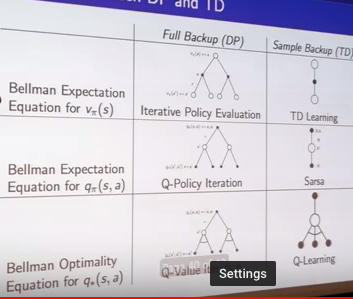

# Lecture 6: Value Function Approximation

- Introduction
- Incremental Methods
- Batch Methods

- Reinforcement learning can be used to solve large problems
    - backgammon : $10^{20}$ states
    - computer go: $10^{170}$ states
    - Helicopter: continuous state space
- How can we scale up from model-free methods for prediction and control from the last two lectures?

- So far we have represented the value function by a lookup table
    - every state s has an entry $V(S)$
    - or every state-action pair, s, a, has an entry $Q(s, a)$
- Problem with large MDPs:
    - There are too many states and/or actions to store in memory
    - It is too slow to learn the value of each state individually
- Solution for large MDP's
    - Estimate value function with function approximation
$$\hat{v}(s, w) \approx v_\pi(s) $$
or
$$\hat{q}(s, a, w) \approx q_\pi(s, a)$$
- Genneralize from sen states to unseen states
- update parameter w using MC or TD learning